#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-9bf91bc92b75>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())



In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### TASK 1: Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
# Drop the first column since it only contains the record/row number and not an actual data
boston_df = boston_df.drop(boston_df.columns[0], axis=1)
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### TASK 2: Generate Descriptive Statistics and Visualizations

#### TASK 2.A: For the "Median value of owner-occupied homes" provide a boxplot

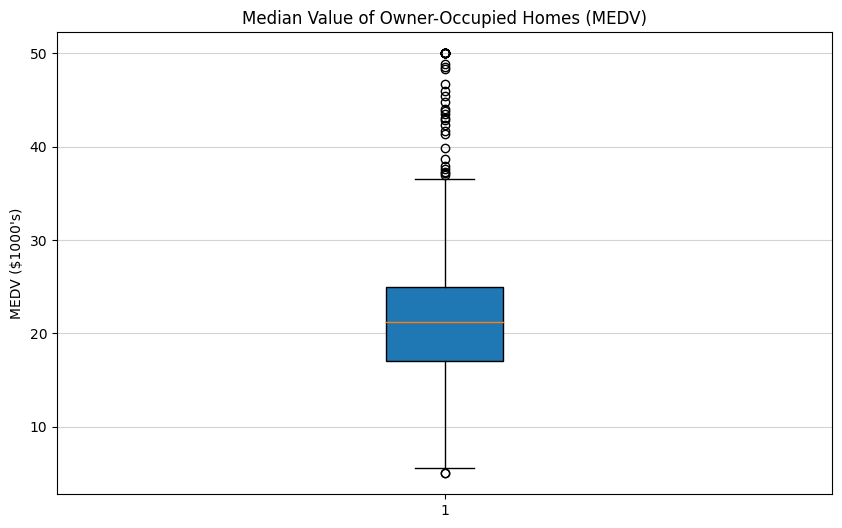

Median Value: 21.2
First Quartile (Q1): 17.025
Third Quartile (Q3): 25.0
Interquartile Range (IQR): 7.975000000000001
Lower Bound for Outliers: 5.0624999999999964
Upper Bound for Outliers: 36.962500000000006


In [7]:
# Boxplot for the "Median value of owner-occupied homes" (MEDV)
plt.figure(figsize=(10, 6))
plt.boxplot(boston_df['MEDV'], patch_artist=True)
plt.title('Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel("MEDV ($1000's)")
plt.grid(axis='y', color='lightgray')
plt.show()

# Calculate statistics 
median_value = boston_df['MEDV'].median() 
q1 = boston_df['MEDV'].quantile(0.25) 
q3 = boston_df['MEDV'].quantile(0.75) 
iqr = q3 - q1 

# Define the outliers 
lower_bound = q1 - 1.5 * iqr 
upper_bound = q3 + 1.5 * iqr 

# Print the statistics 
print(f"Median Value: {median_value}") 
print(f"First Quartile (Q1): {q1}") 
print(f"Third Quartile (Q3): {q3}") 
print(f"Interquartile Range (IQR): {iqr}") 
print(f"Lower Bound for Outliers: {lower_bound}") 
print(f"Upper Bound for Outliers: {upper_bound}") 




TASK 2.A FINDINGS: While there are some outliers especially at the upper values, it can be generally observed that the MEDV still follows normal distribution with the median value at 21,200 dollars. With 50 percent of the MEDV falls between 17,025 and 25,000 dollars.

#### TASK 2.B: Provide a  bar plot for the Charles river variable

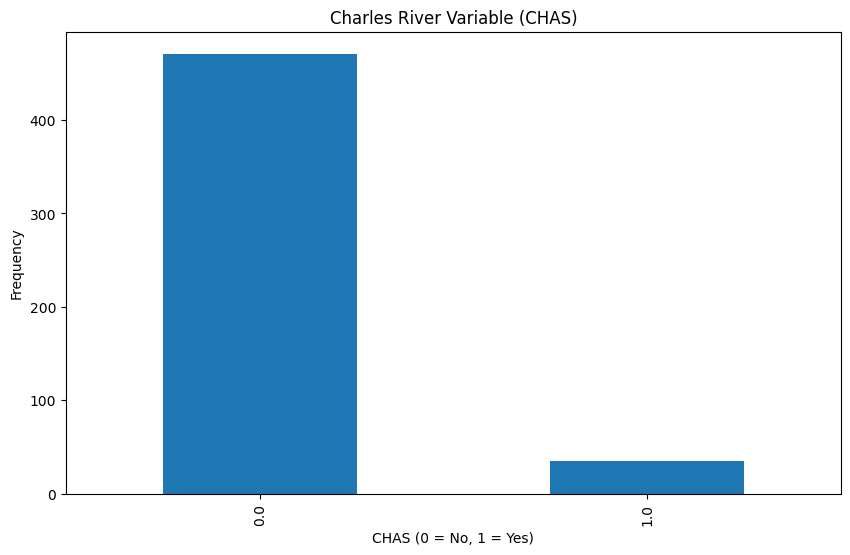

In [8]:
# Bar Plot for the Charles River Variable (CHAS)
plt.figure(figsize=(10, 6))
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Charles River Variable (CHAS)')
plt.xlabel('CHAS (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.show()


TASK 2.B FINDINGS: Majority are not bound by the Charles River

#### TASK 2.C: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<Figure size 1000x600 with 0 Axes>

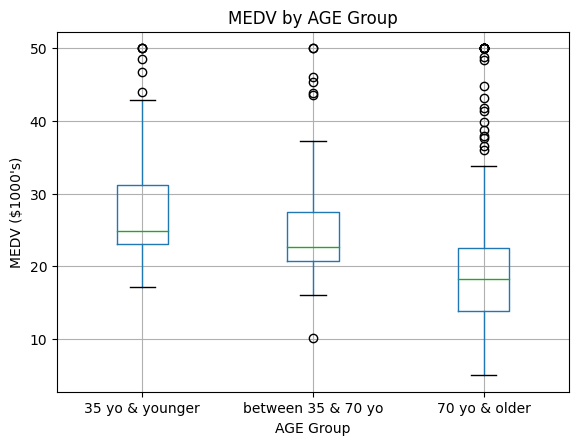

In [17]:

# Discretize AGE variable and Boxplot for MEDV vs AGE
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 yo & younger', 'between 35 & 70 yo', '70 yo & older'])
plt.figure(figsize=(10, 6))
boston_df.boxplot(column='MEDV', by='AGE_group')
plt.title('MEDV by AGE Group')
plt.suptitle('')
plt.xlabel('AGE Group')
plt.ylabel("MEDV ($1000's)")
plt.show()


TASK 2.C FINDINGS: Grouped by Age, skewness can be observed in MEDV for those in the age groups of: '35yo & younger' and ' between 35 & 70 yo'. The most upper value outliers are in the age group of '70 yo & older'

#### TASK 2.D: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

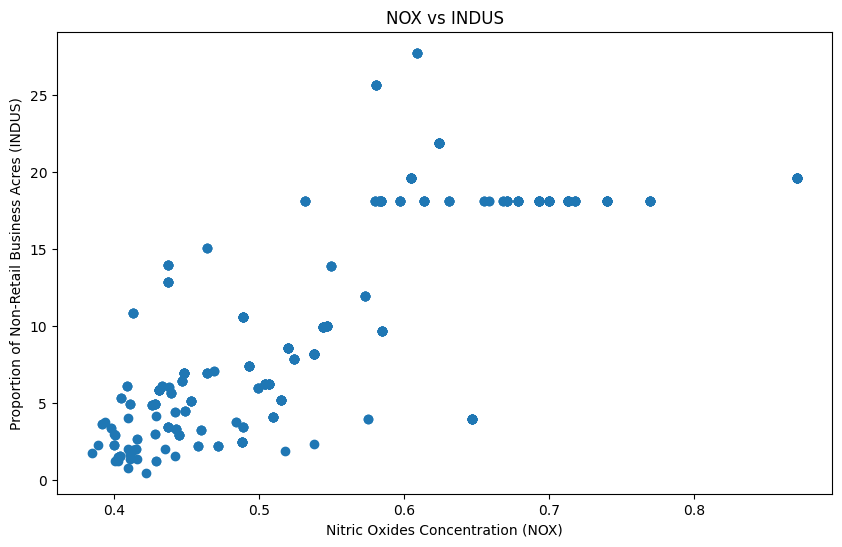

In [11]:

# Scatter Plot for NOX vs INDUS
plt.figure(figsize=(10, 6))
plt.scatter( boston_df['NOX'], boston_df['INDUS'])
plt.title('NOX vs INDUS')
plt.xlabel('Nitric Oxides Concentration (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()


TASK 2.D FINDINGS: Generally towns with lower INDUS (below 10) also have lower Nitric Oxides Concentration (NOX below 0.6).

#### TASK 2E: Create a histogram for the pupil to teacher ratio variable

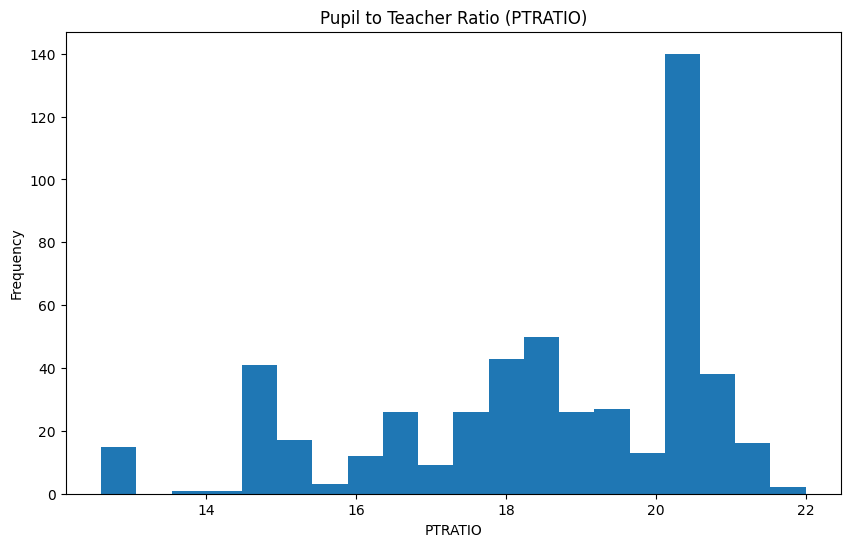

In [13]:

# Histogram for the Pupil to Teacher Ratio (PTRATIO)
plt.figure(figsize=(10, 6))
plt.hist(boston_df['PTRATIO'], bins=20)
plt.title('Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.show()


TASK 2.E FINDINGS: The most common PTRATIO is just over 20. 

### TASK 3: Use the appropriate tests to answer the questions provided.
For each of the following questions:

A) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

B) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

C) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

D) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.
Use α = 0.05
Perform the test Statistics.
State the conclusion from the test.

#### TASK 3.A: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

TASK 3.A Hypothesis:
Null Hypothesis (H0): There is no significant difference in median value of houses bounded by the Charles River (CHAS=1) and those not bounded by the Charles River (CHAS=0).
Alternative Hypothesis (H1): There is a significant difference in median value of houses bounded by the Charles River (CHAS=1) and those not bounded by the Charles River (CHAS=0).

In [19]:
import scipy.stats as stats

# Separate the data into two groups based on CHAS
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform T-test
t_stat, p_value = stats.ttest_ind(chas_0, chas_1)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles River.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in median value of houses bounded by the Charles River.")


T-statistic: -3.996437466090509, P-value: 7.390623170519905e-05
Reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles River.


TASK 3.A Conclusion: There is a significant difference in median value of houses bounded by the Charles River.

#### TASK 3.B) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

TASK 3.B Hypothesis:
Null Hypothesis (H0): There is no difference in median values of houses for each proportion of owner occupied units built prior to 1940.
Alternative Hypothesis (H1): There is a difference in median values of houses for each proportion of owner occupied units built prior to 1940.

In [23]:
# Perform ANOVA
anova_result = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)
print(anova_table)

# Conclusion
if anova_table["PR(>F)"][0] < 0.05:
    print("Reject the null hypothesis. There is a difference in median values of houses for each proportion of owner occupied units built prior to 1940.")
else:
    print("Fail to reject the null hypothesis. There is no difference in median values of houses for each proportion of owner occupied units built prior to 1940.")


                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


<ipython-input-23-2f0fa9dd6dc1>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table["PR(>F)"][0] < 0.05:


Reject the null hypothesis. There is a difference in median values of houses for each proportion of owner occupied units built prior to 1940.


#### Task 3.C) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

TASK 3.C Hypothesis:
Null Hypothesis (H0): There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
Alternative Hypothesis (H1): There is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

In [21]:
# Perform Pearson correlation
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson correlation: {correlation}, P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Fail to reject the null hypothesis. There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")


Pearson correlation: 0.7636514469209192, P-value: 7.913361061210442e-98
Reject the null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


TASK 3.C Conclusion: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
        

#### Task 3.D) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

TASK 3.D Hypothesis:
Null Hypothesis (H0): There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.
Alternative Hypothesis (H1): There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.

In [22]:
# Perform Regression analysis
regression_result = ols('MEDV ~ DIS', data=boston_df).fit()
print(regression_result.summary())

# Conclusion
if regression_result.pvalues['DIS'] < 0.05:
    print("Reject the null hypothesis. There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")
else:
    print("Fail to reject the null hypothesis. There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        03:35:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

Findings: 
The coefficient for the distance variable (DIS) is 1.0916, which is statistically significant with a p-value of 0.000. This suggests that for every additional unit increase in the weighted distance to the employment centers, the median value of owner-occupied homes increases by approximately 1.0916 units.

The positive sign of the coefficient indicates that, contrary to what we might typically expect, an increase in distance from these employment centers is associated with an increase in median  values of owner occupied homes.

However, it's important to note the R-squared value of 0.062, indicating that only about 6.2% of the variability in median home values is explained by this model. This suggests that there are many other factors influencing home values that are not accounted for in this model.

Conclusion: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.